In [1]:
### testing UnitType

In [17]:
from cntk.learner import training_parameter_schedule, momentum_schedule, UnitType
import numpy as np
import matplotlib.pyplot as plt
from cntk.layers import Dense
from cntk.models import Sequential
import cntk.ops as C
from cntk.ops import element_times, constant
from cntk.io import MinibatchSource, CTFDeserializer, StreamDef, StreamDefs, INFINITELY_REPEAT
from cntk.learner import sgd
from cntk import Trainer

import sys
from getpass import getuser
sys.path.append('/home/'+getuser()+'/git_test')
from Teemo.examples.math import load_data
from Teemo.algorithm.utils import matrixops

In [24]:
## prepare learner schedule
## prepare data 
trn_x, trn_y, valid_x, valid_y = load_data.Hstep() ## training samples: 1,000, validation samples: 100
trn_samples = trn_x.shape[0]
lr = training_parameter_schedule([0.01, 0.001], unit=UnitType.sample, epoch_size=trn_samples)

In [25]:
## prepare model
input_dim = 1
output_dim = 1

input = C.input_variable(input_dim, np.float32)
label = C.input_variable(output_dim, np.float32)
mlp = Sequential([Dense(3, activation=C.tanh),
                  Dense(3, activation=C.sigmoid),
                  Dense(output_dim, activation=None)])(input)

loss = C.squared_error(mlp, label)
error = C.squared_error(mlp, label)
trainer = Trainer(mlp, loss, error, [sgd(mlp.parameters, lr=lr)])



epoch: 0, loss: 248.48322265625
epoch: 1, loss: 490.676796875
epoch: 2, loss: 493.8709765625
epoch: 3, loss: 490.676953125
epoch: 4, loss: 493.8711328125
epoch: 5, loss: 490.6770703125
epoch: 6, loss: 493.871328125
epoch: 7, loss: 490.6773046875
epoch: 8, loss: 493.8715234375
epoch: 9, loss: 490.677421875


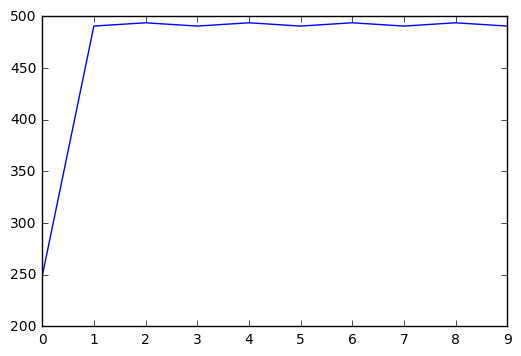

In [26]:
loss_list = []
for ii in range(10):
    for mb_x, mb_y in matrixops.iterate_minibatches(minibatch_size, trn_x, trn_y, shuffle=True)
        trainer.train_minibatch({input: mb_x, label: mb_y})
    valid_loss = trainer.test_minibatch({input: valid_x, label: valid_y})
    loss_list.append(valid_loss)
    print ('epoch: {0}, loss: {1}'.format(ii, valid_loss))

plt.plot(loss_list)
plt.show()